# Import libraries

In [1]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import pandas as pd
import re

import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# Model building

In [2]:
cEXT = pickle.load( open( "data/models/cEXT.p", "rb"))
cNEU = pickle.load( open( "data/models/cNEU.p", "rb"))
cAGR = pickle.load( open( "data/models/cAGR.p", "rb"))
cCON = pickle.load( open( "data/models/cCON.p", "rb"))
cOPN = pickle.load( open( "data/models/cOPN.p", "rb"))
vectorizer_31 = pickle.load( open( "data/models/vectorizer_31.p", "rb"))
vectorizer_30 = pickle.load( open( "data/models/vectorizer_30.p", "rb"))

C:\Users\alyan\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\alyan\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\alyan\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 1.2.2. This might lead to breaking code or invalid resul

# Functions

In [3]:
# function used to predict personality
def predict_personality(text):
    scentences = re.split("(?<=[.!?]) +", text)
    text_vector_31 = vectorizer_31.transform(scentences)
    text_vector_30 = vectorizer_30.transform(scentences)
    EXT = cEXT.predict(text_vector_31)
    NEU = cNEU.predict(text_vector_30)
    AGR = cAGR.predict(text_vector_31)
    CON = cCON.predict(text_vector_31)
    OPN = cOPN.predict(text_vector_31)
    return [EXT[0], NEU[0], AGR[0], CON[0], OPN[0]]

In [4]:
# gets all the lines from the file and returns it as a list of strings
def open_book(book_file_path):
    f = open(book_file_path, "r", encoding="utf-8")
    contents = f.read()
    lst = contents.split("\n")
    f.close()
    return lst

In [5]:
# calculate average personality from book
def find_avg_personality(book_file):
    # get all the lines of the character from the book
    book_lst = open_book(file)
    
    book_predictions = []
    
    for line in book_lst:
        # go line by line in the book, and get the predicted big five personality for each line
        predictions = predict_personality(line)
        
        # store this predicted big five personality for the line in a list
        book_predictions.append(predictions)
        
    # find the average big five personality of the character for the book
    book_personality = [sum(x)/len(x) for x in zip(*book_predictions)]
    
    return book_personality

In [6]:
# label points on graph
def annotate_graph(x_points, y_points,dp):
    for x, y in zip(x_points, y_points):
        plt.annotate(round(y, dp), (x,y))

In [7]:
# plot the graph
def plot_graph(personality, book_titles, annabeth_ypoints, percy_ypoints):
    # plot the 2 lines
    plt.plot(book_titles, annabeth_ypoints, marker = 'o', color = 'Sienna', label = 'Annabeth') # annabeth plot
    plt.plot(book_titles, percy_ypoints, marker = 'o', color = 'DarkBlue', label = 'Percy') #percy plot
    
    # annotate the points, round the dp to 5 dp so it's neater
    annotate_graph(book_titles,annabeth_ypoints, 5) # annabeth
    annotate_graph(book_titles, percy_ypoints, 5) # percy
    
    # add legend
    if personality in ['Extraversion', 'Openness']:
        plt.legend(loc="lower left")
    else:
        plt.legend(loc="lower right")
    
    # title the graph
    personality_title = "Plot of {}".format(personality)
    plt.title(personality_title)
    
    # name of file
    file_path = os.path.join(results_folder, personality_title.replace(' ', '-') + ".png")
    
    # label the x-axis
    plt.xlabel("Book Titles")
    
    # draw the lines for the x-axis
    plt.grid(axis = 'x')
    
    # space out the plots
    plt.tight_layout()
    
    # save graph
    plt.savefig(file_path)

    # show graph
    plt.show()
    
    return plt

# Import Files and other Functions

In [8]:
# folders
## folder with exported character dialogue
quotes_folder = r'..\character-quotes'

## folder to export results to
results_folder = r'..\results'

In [9]:
# book titles
book_titles = ["tlt", "som", "ttc", "bol", "tlo"]
book_titles_caps = [i.upper() for i in book_titles]

# character dialogue files
annabeth_files = [os.path.join(quotes_folder,"annabeth_" + book + ".txt") for book in book_titles]
percy_files = [os.path.join(quotes_folder,"percy_" + book + ".txt") for book in book_titles]

# big five
big_five_abb = ['EXT', 'NEU', 'AGR', 'CON', 'OPN']
big_five = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']

# Create results folder if it doesn't exist to store results

In [10]:
for folder in [results_folder]:
    # create folder if it doesn't exist
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    # if folder has items, clear all items before starting
    for i in os.listdir(folder):
        item_path = os.path.join(folder, i)

        if not(os.path.isfile(item_path)):
            clear_folder(item_path)

# Predictions

In [11]:
# get annabeth's personality across all the books
annabeth_personality = []

for file in annabeth_files:
    # get the personality for the book
    book_personality = find_avg_personality(file)
    
    # append to list
    annabeth_personality.append(book_personality)

In [12]:
# get percy's personality across all the books
percy_personality = []

for file in percy_files:
    # get the personality for the book
    book_personality = find_avg_personality(file)
    
    percy_personality.append(book_personality)

# Results

In [13]:
annabeth_df = pd.DataFrame(annabeth_personality, columns = big_five_abb, index = book_titles_caps)
percy_df = pd.DataFrame(percy_personality, columns = big_five_abb, index = book_titles_caps)

In [14]:
annabeth_df.transpose()

,TLT,SOM,TTC,BOL,TLO
EXT,0.911439,0.930041,0.949153,0.895408,0.927536
NEU,0.955720,0.987654,0.983051,0.987245,0.975845
AGR,0.380074,0.465021,0.372881,0.397959,0.391304
CON,0.166052,0.172840,0.152542,0.142857,0.178744
OPN,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
percy_df.transpose()

,TLT,SOM,TTC,BOL,TLO
EXT,0.929779,0.943327,0.937250,0.938065,0.900104
NEU,0.960988,0.959781,0.967957,0.966452,0.964620
AGR,0.397919,0.411335,0.405874,0.409032,0.413111
CON,0.143043,0.122486,0.136182,0.130323,0.174818
OPN,1.000000,1.000000,1.000000,1.000000,0.998959


## Plot Graphs

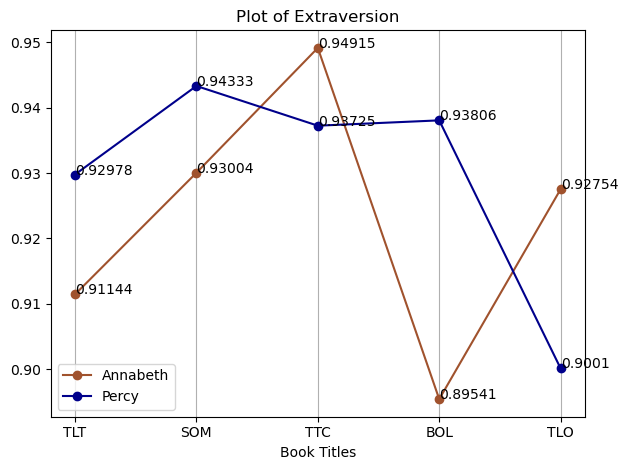

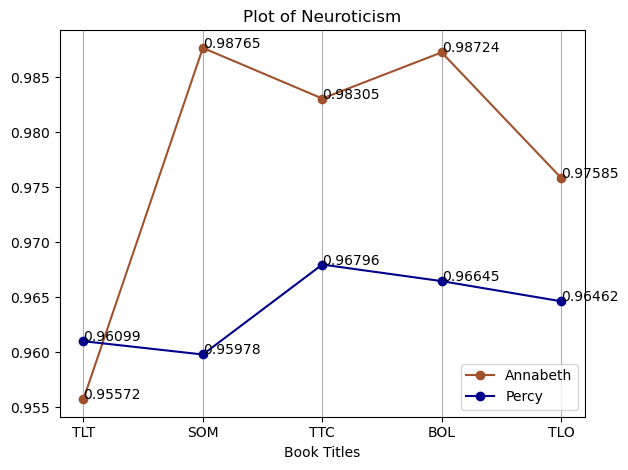

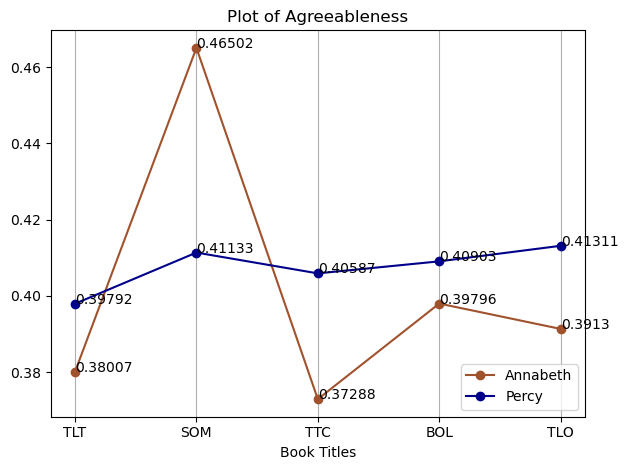

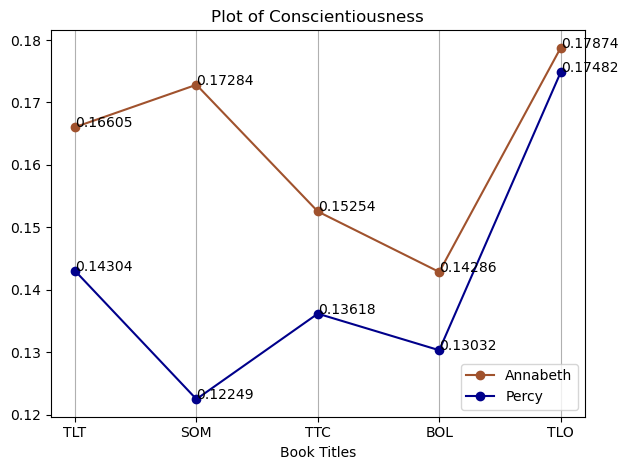

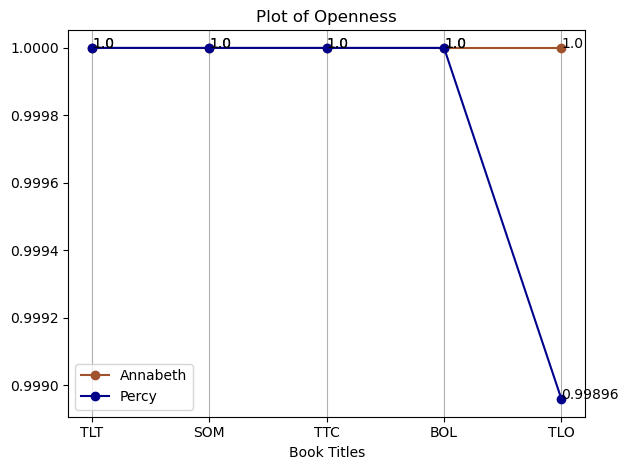

In [16]:
for index in range(len(big_five_abb)):
    # personality
    personality_abb = big_five_abb[index]
    personality = big_five[index]
    
    # get the data points for the specific big five personality
    annabeth_ypoints = np.array(list(annabeth_df[personality_abb]))
    percy_ypoints = np.array(list(percy_df[personality_abb]))
    
    # plot the graph
    plt = plot_graph(personality, book_titles_caps, annabeth_ypoints, percy_ypoints)